In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
user_data = pd.read_csv(
    "/home/dmitrii/vscode_projects/PMLDL/Assignment2/data/raw/ml-100k/u.data",
    sep='\t',
    names=['user_id', 'movie_id', 'rating', 'timestamp']
    )
user_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
user_data['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

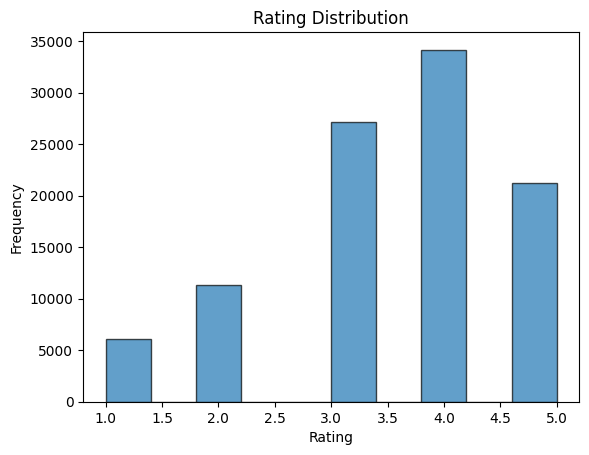

In [42]:
user_data['rating'].plot(kind='hist', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

In [4]:
user_data.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [5]:
genres = pd.read_csv('/home/dmitrii/vscode_projects/PMLDL/Assignment2/data/raw/ml-100k/u.genre',
                    names=["genre", "index"],
                    sep='|')
genres_list = genres.genre.to_list()

user_item_names = ['movie_id', 'movie_title', 'release_date', 'video_release_date,', 'imdb_url']
user_item_names.extend(genres_list)
user_item = pd.read_csv(
    "/home/dmitrii/vscode_projects/PMLDL/Assignment2/data/raw/ml-100k/u.item", 
    sep='|',
    encoding='latin-1',
    index_col=False,
    names=user_item_names
)

user_item.head()

,movie_id,movie_title,release_date,"video_release_date,",imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user_item.isnull().sum()

movie_id                  0
movie_title               0
release_date              1
video_release_date,    1682
imdb_url                  3
unknown                   0
Action                    0
Adventure                 0
Animation                 0
Children's                0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
dtype: int64

In [7]:
genres_freq = user_item[[c for c in user_item.columns if c in genres_list]].sum()

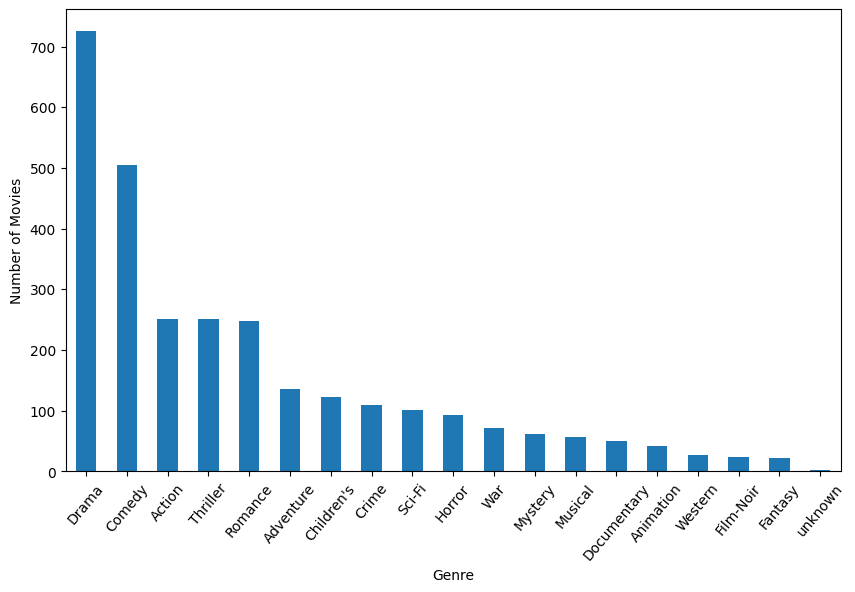

In [19]:
plt.figure(figsize=(10,6))
genres_freq.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

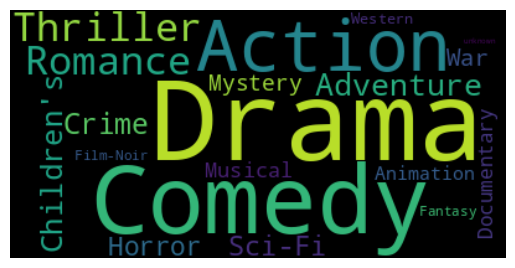

In [11]:
from wordcloud import WordCloud


wordcloud = WordCloud(background_color='black').generate_from_frequencies(genres_freq.to_dict())

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
user_user = pd.read_csv(
    "/home/dmitrii/vscode_projects/PMLDL/Assignment2/data/raw/ml-100k/u.user",
    sep='|',
    names=['id', 'age', 'gender', 'occupation', 'zipcode']
)

user_user.head()

,id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


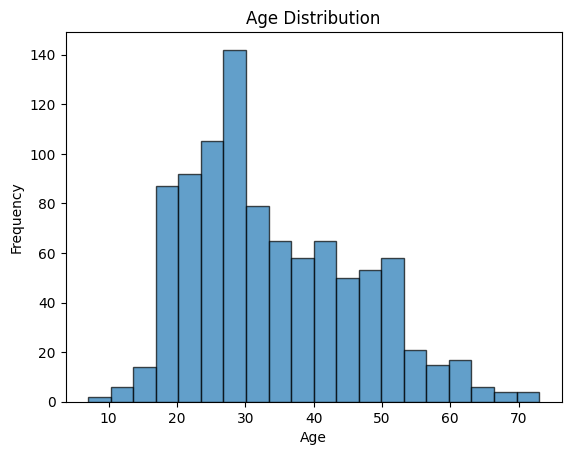

In [21]:
user_user['age'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [13]:
user_user.isnull().sum()

id            0
age           0
gender        0
occupation    0
zipcode       0
dtype: int64

In [14]:
user_user.describe()

,id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [27]:
user_user.occupation.value_counts()[:5]

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
Name: count, dtype: int64

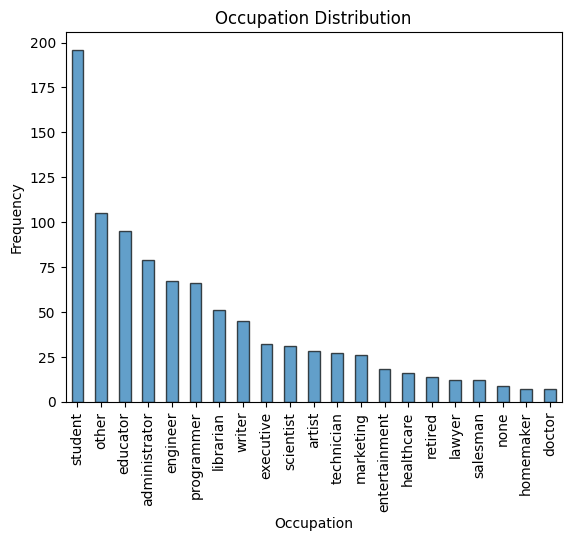

In [33]:
user_user.occupation.value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Occupation Distribution')

# Show the plot
plt.show()

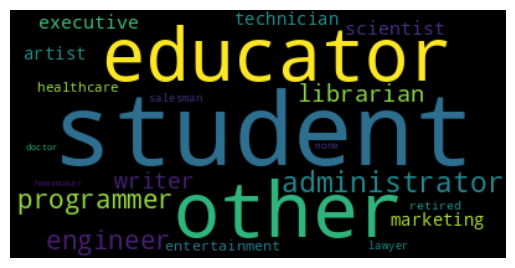

In [43]:
wordcloud = WordCloud(background_color='black').generate_from_frequencies(user_user.occupation.value_counts())

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()